In [3]:
import os
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.api.preprocessing.image import load_img, img_to_array
from keras.api.utils import to_categorical
import glob

(256, 256, 3)


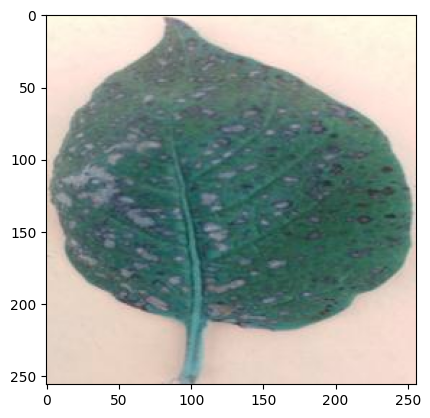

In [4]:
DIR = "/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training"
CATEGORIES = ['Early_Blight', 'Healthy', 'Late_Blight']


for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, image))
        plt.imshow(img_arr)
        print(img_arr.shape)
        break
    break



In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)
        classes = CATEGORIES.index(category)

        for image in os.listdir(path):
            img = load_img(os.path.join(path, image), target_size=(224, 224))
            img_arr = img_to_array(img)
            img_arr = img_arr/255
            print("Shape: ", img_arr.shape)
            training_data.append([img_arr, classes])

print(img_arr.shape)

img_data = np.array(training_data)
img_data = img_data.astype('float32')
print (img_data.shape)


create_training_data()

(256, 256, 3)
(0,)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224,

In [6]:
print(len(training_data))
import random

random.shuffle(training_data)

for sample in  training_data[:10]:
    print(sample[1])


3251
1
0
1
1
2
0
2
0
0
2


In [7]:
features = []
labels = []


for x, y in training_data:
    features.append(x)
    labels.append(y)

x = np.array(x).reshape(-1, 224, 224, 3)

In [8]:
import pickle

# dumping the features and labels
pickle_out = open("features.pkl","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

pickle_out = open("labels.pkl","wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [9]:
pickle_in_features = open('features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
y = to_categorical(y)

In [10]:
print(len(x))
print(len(y))

3251
3251


In [11]:
import pickle
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
# Instead of "from keras.layers import merge, Input", use:
from keras import Input  # Input is now directly under keras
from keras.layers import concatenate # merge is replaced with concatenate
from keras.models import Model
from tensorflow.keras.utils import to_categorical # to_categorical is now here

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2275, 224, 224, 3)
(2275, 3)
(976, 224, 224, 3)
(976, 3)


In [13]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16 # Import VGG16
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

classes = 3

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet') # Now VGG16 is defined


last_layer = model.get_layer('fc2').output
X = last_layer
d1 = Dropout(0.3, name='dropout_layer_1')(X)
out = Dense(3, activation='softmax', name='output')(d1) # Updated for 3 classes
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

print(image_input.shape)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

(None, 224, 224, 3)


In [19]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

t = time.time()

hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=12, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))



Epoch 1/12
57/57 - 9s - 155ms/step - accuracy: 0.6929 - loss: 0.7744 - val_accuracy: 0.7868 - val_loss: 0.5036
Epoch 2/12
57/57 - 5s - 83ms/step - accuracy: 0.7159 - loss: 0.7156 - val_accuracy: 0.6857 - val_loss: 0.7031
Epoch 3/12
57/57 - 5s - 83ms/step - accuracy: 0.7297 - loss: 0.7162 - val_accuracy: 0.7670 - val_loss: 0.5594
Epoch 4/12
57/57 - 5s - 83ms/step - accuracy: 0.7319 - loss: 0.6828 - val_accuracy: 0.6945 - val_loss: 0.7266
Epoch 5/12
57/57 - 5s - 83ms/step - accuracy: 0.7445 - loss: 0.6591 - val_accuracy: 0.8000 - val_loss: 0.5056
Epoch 6/12
57/57 - 5s - 82ms/step - accuracy: 0.7368 - loss: 0.6720 - val_accuracy: 0.8132 - val_loss: 0.4715
Epoch 7/12
57/57 - 5s - 82ms/step - accuracy: 0.7451 - loss: 0.6519 - val_accuracy: 0.5956 - val_loss: 1.2224
Epoch 8/12
57/57 - 5s - 83ms/step - accuracy: 0.7462 - loss: 0.6488 - val_accuracy: 0.7604 - val_loss: 0.5992
Epoch 9/12
57/57 - 5s - 83ms/step - accuracy: 0.7341 - loss: 0.6431 - val_accuracy: 0.7429 - val_loss: 0.6936
Epoch 10/

In [20]:
# Evaluate the model on the test data
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test, batch_size=10, verbose=2)

# Print the loss and accuracy
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

# Predict the classes for the test data
y_pred = custom_vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to multiclass format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Generate a classification report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes))

# Optionally, print the predicted classes
print("Predicted classes:", y_pred_classes)


98/98 - 3s - 32ms/step - accuracy: 0.8135 - loss: 0.4610
[INFO] loss=0.4610, accuracy: 81.3525%
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       396
           1       0.83      0.68      0.74       239
           2       0.72      0.90      0.80       341

    accuracy                           0.81       976
   macro avg       0.82      0.80      0.80       976
weighted avg       0.83      0.81      0.81       976

Predicted classes: [2 2 2 0 2 1 2 2 2 2 2 0 0 1 2 2 1 2 0 2 1 2 0 2 2 2 0 2 0 2 2 2 2 1 2 1 0
 2 0 0 1 1 2 1 2 0 2 2 2 1 1 2 2 2 0 0 2 0 1 1 0 2 1 1 1 0 1 2 2 1 2 1 2 2
 1 2 2 2 1 1 2 1 0 0 0 2 2 2 0 2 2 0 0 2 2 2 2 2 1 0 0 1 2 2 1 0 1 2 2 0 2
 0 1 0 0 1 0 2 2 1 0 0 1 0 0 0 2 0 2 0 2 2 1 0 2 2 2 2 2 2 0 2 0 2 0 2 1 2
 0 0 0 0 1 0 2 0 2 2 2 0 0 2 0 2 0 0 1 0 2 0 2 1 0 0 2 0 2 0 0 0 0 2 0 0 0
 1 1 0 0 0 0 0 1 2 2 1 0 2 0 2 1 1 2 0 2 0 1 1 2 2 2 1 1 2 2 0 0 0 2 2 1 0
 0 0 2 0 2 0 2

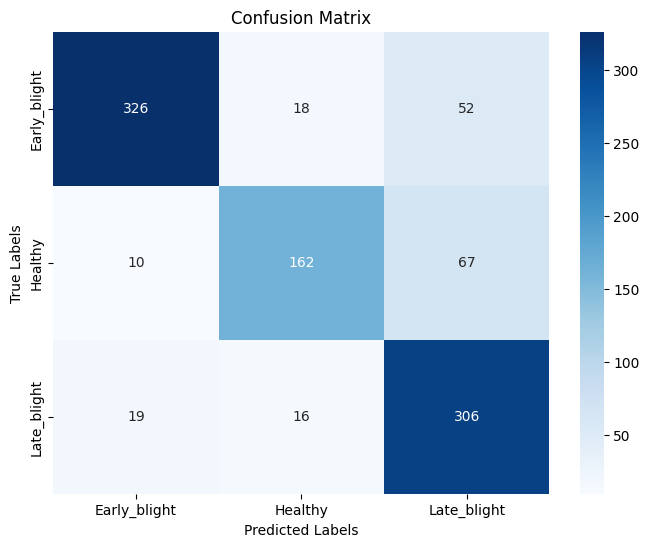

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_classes and y_pred_classes are already defined
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Early_blight', 'Healthy', 'Late_blight'], 
            yticklabels=['Early_blight', 'Healthy', 'Late_blight'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


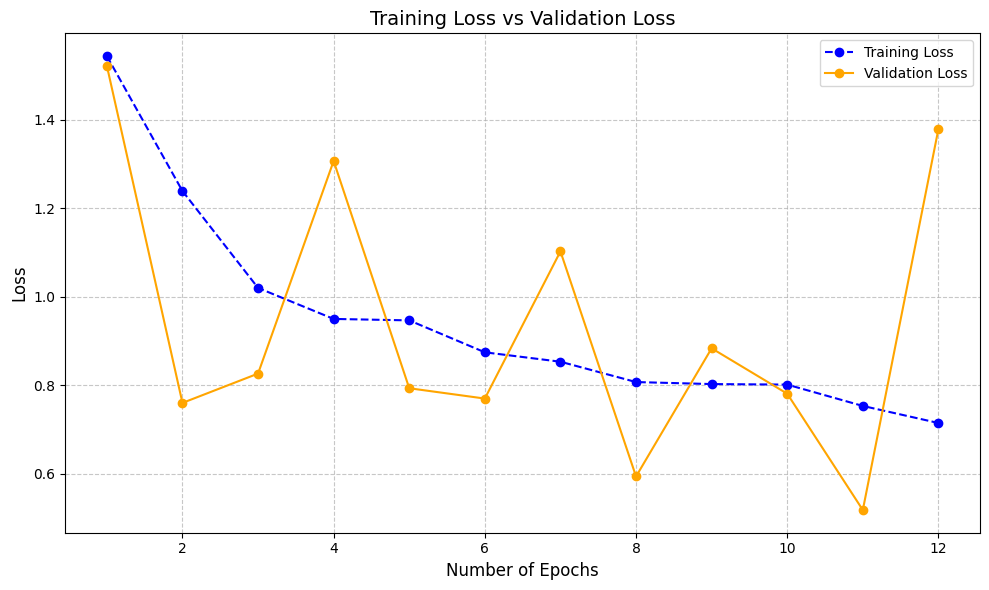

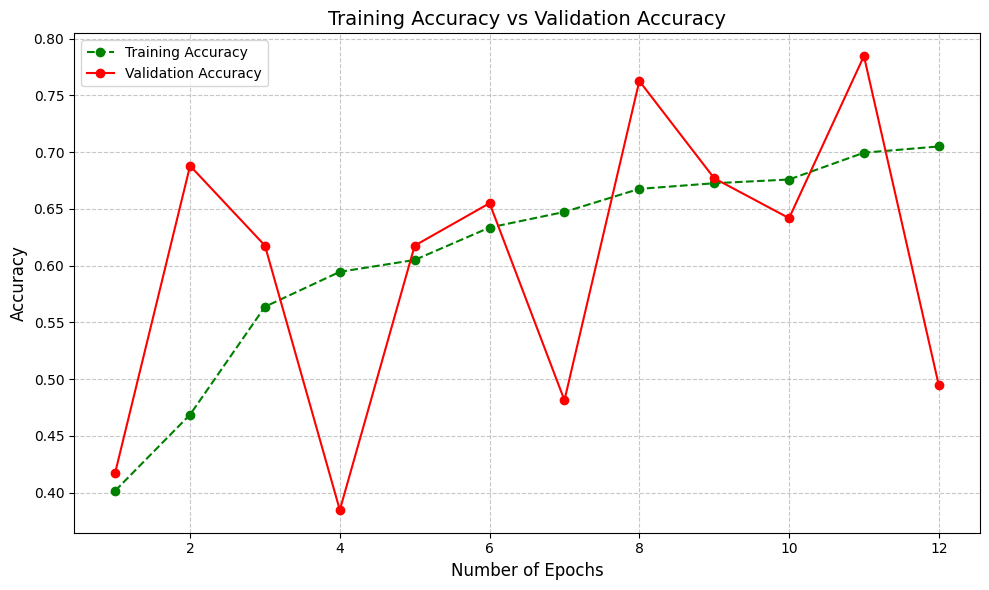

In [17]:
import matplotlib.pyplot as plt

# Extract training and validation metrics from history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)  # Dynamically adjust based on the number of epochs

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='--', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='-', color='orange')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss vs Validation Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o', linestyle='--', color='green')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o', linestyle='-', color='red')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training Accuracy vs Validation Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
